In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("articoder/news-dataset-for-news-bias-analysis")

print("Path to dataset files:", path)

100%|██████████| 16.8M/16.8M [00:00<00:00, 90.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/articoder/news-dataset-for-news-bias-analysis/versions/1


In [ ]:
import os

path = "/root/.cache/kagglehub/datasets/articoder/news-dataset-for-news-bias-analysis/versions/1"
print(os.listdir(path))


['news_article_dataset.tsv', 'news_article_dataset.json']


In [ ]:
# import pandas as pd
# import json

# file_path = os.path.join(path, "/root/.cache/kagglehub/datasets/articoder/news-dataset-for-news-bias-analysis/versions/1/news_article_dataset.json")  # replace with actual filename
# with open(file_path, "r", encoding="utf-8") as f:
#     data = json.load(f)

# # Convert to DataFrame
# df = pd.DataFrame(data)
# df.head()


In [ ]:
import pandas as pd
import os

path = "/root/.cache/kagglehub/datasets/articoder/news-dataset-for-news-bias-analysis/versions/1"
file_path = os.path.join(path, "news_article_dataset.tsv")  # or whatever it’s named

df = pd.read_csv(file_path, sep="\t", encoding="utf-8")
print(df.shape)
print(df.columns)
df.head()


(8478, 15)
Index(['Unnamed: 0', 'Title of Headline Roundup', 'description', 'Topics',
       'Date', 'url_story', 'left_story_title', 'center_story_title',
       'right_story_title', 'right_story_url', 'right_story_text',
       'center_story_url', 'center_story_text', 'left_story_url',
       'left_story_text'],
      dtype='object')


,Unnamed: 0,Title of Headline Roundup,description,Topics,Date,url_story,left_story_title,center_story_title,right_story_title,right_story_url,right_story_text,center_story_url,center_story_text,left_story_url,left_story_text
0,3513,Romney in London,NaN,Elections,2012-07-26,/story/romney-london,Romney's Olympics false start,Shaky Start for Romney Overseas Trip,Romney causes London stir over Olympic readine...,http://politics.blogs.foxnews.com/2012/07/26/r...,"The Brits, taking a break from beating up on t...",http://online.wsj.com/article/SB10000872396390...,Mitt Romney launched an overseas tour Thursday...,http://politicalticker.blogs.cnn.com/2012/07/2...,Mitt Romney told British leaders he hopes to t...
1,3512,Romney's Overseas Trip,NaN,Elections,2012-08-01,/story/romneys-overseas-trip,Was Romney's trip 'a great success' or gaffe-f...,Romney's Overseas Trip Produces Hits and Misses,RomneyÃ¢â‚¬â„¢s trip a bumpy ride,http://www.washingtontimes.com/news/2012/jul/3...,Under mounting pressure to be more open on for...,http://online.wsj.com/article/SB10000872396390...,"WARSAWâ€”With a speech lauding Poland as a ""de...",http://www.cnn.com/2012/07/31/politics/romney-...,OPINION\nWarsaw (CNN) -- In the estimation of ...
2,3511,Biden Comment Controversy,NaN,Elections,2012-08-16,/story/biden-comment-controversy,Mission Impossible: Managing Joe Biden,Campaign Trail: Biden's Comment About 'Chains'...,Ryan takes on Obama campaign over Biden 'chain...,http://www.foxnews.com/politics/2012/08/15/oba...,Paul Ryan is taking on the Obama campaign dire...,http://www.npr.org/blogs/thetwo-way/2012/08/15...,By telling a racially mixed audience in Virgin...,http://www.politico.com/news/stories/0812/7977...,The most emotionally powerful minute of Joe Bi...
3,3510,Romney Taxes,NaN,Elections,2012-08-17,/story/romney-taxes,Obama Campaign Wants Romney To Release 5 Years...,Romney Says He Paid A Tax Rate Of At Least 13 ...,Romney campaign doesn't bite on Obama tax retu...,http://www.foxnews.com/politics/2012/08/17/oba...,The Obama campaign made an unusual offer to Mi...,http://www.npr.org/blogs/itsallpolitics/2012/0...,Republican presidential candidate Mitt Romney ...,http://www.huffingtonpost.com/2012/08/17/obama...,With the spotlight back on Mitt Romney's tax r...
4,3509,Skinnydipping Congressman,NaN,US Congress,2012-08-20,/story/skinnydipping-congressman,"Exclusive: FBI probed GOP trip with drinking, ...",Congressman Who Took Nude Dip In Sea Of Galile...,Account of overseas skinny-dipping fuels clari...,http://www.foxnews.com/politics/2012/08/20/rep...,A bizarre report about Republican congressmen ...,http://www.npr.org/blogs/thetwo-way/2012/08/20...,"Saying he apologizes for ""any embarrassment I ...",http://www.politico.com/news/stories/0812/7986...,The FBI probed a late-night swim in the Sea of...


In [ ]:
df.shape

(8478, 15)

Want to melt it into long format.

In [ ]:
bias_cols = ["left_story_text", "center_story_text", "right_story_text"]

In [ ]:
dftext = df.melt(id_vars = ["Topics", "Date"], value_vars = bias_cols, var_name = "bias_label", value_name = "text")
dftext.head()

,Topics,Date,bias_label,text
0,Elections,2012-07-26,left_story_text,Mitt Romney told British leaders he hopes to t...
1,Elections,2012-08-01,left_story_text,OPINION\nWarsaw (CNN) -- In the estimation of ...
2,Elections,2012-08-16,left_story_text,The most emotionally powerful minute of Joe Bi...
3,Elections,2012-08-17,left_story_text,With the spotlight back on Mitt Romney's tax r...
4,US Congress,2012-08-20,left_story_text,The FBI probed a late-night swim in the Sea of...


In [ ]:
url_bias = ["left_story_url", "center_story_url", "right_story_url"]

In [ ]:
dfurl = df.melt(id_vars = ["Topics", "Date"], value_vars = url_bias, var_name = "url_label", value_name = "url")
dfurl.head()

,Topics,Date,url_label,url
0,Elections,2012-07-26,left_story_url,http://politicalticker.blogs.cnn.com/2012/07/2...
1,Elections,2012-08-01,left_story_url,http://www.cnn.com/2012/07/31/politics/romney-...
2,Elections,2012-08-16,left_story_url,http://www.politico.com/news/stories/0812/7977...
3,Elections,2012-08-17,left_story_url,http://www.huffingtonpost.com/2012/08/17/obama...
4,US Congress,2012-08-20,left_story_url,http://www.politico.com/news/stories/0812/7986...


In [ ]:
full_df = pd.merge(left = dftext, right = dfurl, on = ["Topics", "Date"])
full_df.head()

,Topics,Date,bias_label,text,url_label,url
0,Elections,2012-07-26,left_story_text,Mitt Romney told British leaders he hopes to t...,left_story_url,http://politicalticker.blogs.cnn.com/2012/07/2...
1,Elections,2012-07-26,left_story_text,Mitt Romney told British leaders he hopes to t...,center_story_url,http://online.wsj.com/article/SB10000872396390...
2,Elections,2012-07-26,left_story_text,Mitt Romney told British leaders he hopes to t...,right_story_url,http://politics.blogs.foxnews.com/2012/07/26/r...
3,Elections,2012-08-01,left_story_text,OPINION\nWarsaw (CNN) -- In the estimation of ...,left_story_url,http://www.cnn.com/2012/07/31/politics/romney-...
4,Elections,2012-08-01,left_story_text,OPINION\nWarsaw (CNN) -- In the estimation of ...,center_story_url,http://online.wsj.com/article/SB10000872396390...


In [ ]:
full_df["bias_prefix"] = full_df["bias_label"].str.split("_").str[0]
full_df["url_prefix"] = full_df["url_label"].str.split("_").str[0]

full_df.head()

,Topics,Date,bias_label,text,url_label,url,bias_prefix,url_prefix
0,Elections,2012-07-26,left_story_text,Mitt Romney told British leaders he hopes to t...,left_story_url,http://politicalticker.blogs.cnn.com/2012/07/2...,left,left
1,Elections,2012-07-26,left_story_text,Mitt Romney told British leaders he hopes to t...,center_story_url,http://online.wsj.com/article/SB10000872396390...,left,center
2,Elections,2012-07-26,left_story_text,Mitt Romney told British leaders he hopes to t...,right_story_url,http://politics.blogs.foxnews.com/2012/07/26/r...,left,right
3,Elections,2012-08-01,left_story_text,OPINION\nWarsaw (CNN) -- In the estimation of ...,left_story_url,http://www.cnn.com/2012/07/31/politics/romney-...,left,left
4,Elections,2012-08-01,left_story_text,OPINION\nWarsaw (CNN) -- In the estimation of ...,center_story_url,http://online.wsj.com/article/SB10000872396390...,left,center


In [ ]:
full_df = full_df[full_df["bias_prefix"] == full_df["url_prefix"]]
full_df.head()

,Topics,Date,bias_label,text,url_label,url,bias_prefix,url_prefix
0,Elections,2012-07-26,left_story_text,Mitt Romney told British leaders he hopes to t...,left_story_url,http://politicalticker.blogs.cnn.com/2012/07/2...,left,left
3,Elections,2012-08-01,left_story_text,OPINION\nWarsaw (CNN) -- In the estimation of ...,left_story_url,http://www.cnn.com/2012/07/31/politics/romney-...,left,left
6,Elections,2012-08-16,left_story_text,The most emotionally powerful minute of Joe Bi...,left_story_url,http://www.politico.com/news/stories/0812/7977...,left,left
9,Elections,2012-08-17,left_story_text,With the spotlight back on Mitt Romney's tax r...,left_story_url,http://www.huffingtonpost.com/2012/08/17/obama...,left,left
12,US Congress,2012-08-20,left_story_text,The FBI probed a late-night swim in the Sea of...,left_story_url,http://www.politico.com/news/stories/0812/7986...,left,left


In [ ]:
full_df.shape

(29970, 8)

Only need one feature label tbh, also need to clean up the text a bit, remove mentions of the news organization from the texts. We will use string operations and regex for this.

In [ ]:
full_df.drop("url_label", axis = 1, inplace = True)
full_df.head()

,Topics,Date,bias_label,text,url,bias_prefix,url_prefix
0,Elections,2012-07-26,left_story_text,Mitt Romney told British leaders he hopes to t...,http://politicalticker.blogs.cnn.com/2012/07/2...,left,left
3,Elections,2012-08-01,left_story_text,OPINION\nWarsaw (CNN) -- In the estimation of ...,http://www.cnn.com/2012/07/31/politics/romney-...,left,left
6,Elections,2012-08-16,left_story_text,The most emotionally powerful minute of Joe Bi...,http://www.politico.com/news/stories/0812/7977...,left,left
9,Elections,2012-08-17,left_story_text,With the spotlight back on Mitt Romney's tax r...,http://www.huffingtonpost.com/2012/08/17/obama...,left,left
12,US Congress,2012-08-20,left_story_text,The FBI probed a late-night swim in the Sea of...,http://www.politico.com/news/stories/0812/7986...,left,left


In [ ]:
full_df["bias_label"] = full_df["bias_label"].str.replace(r"_story_text", "")
full_df.head()

,Topics,Date,bias_label,text,url,bias_prefix,url_prefix
0,Elections,2012-07-26,left,Mitt Romney told British leaders he hopes to t...,http://politicalticker.blogs.cnn.com/2012/07/2...,left,left
3,Elections,2012-08-01,left,OPINION\nWarsaw (CNN) -- In the estimation of ...,http://www.cnn.com/2012/07/31/politics/romney-...,left,left
6,Elections,2012-08-16,left,The most emotionally powerful minute of Joe Bi...,http://www.politico.com/news/stories/0812/7977...,left,left
9,Elections,2012-08-17,left,With the spotlight back on Mitt Romney's tax r...,http://www.huffingtonpost.com/2012/08/17/obama...,left,left
12,US Congress,2012-08-20,left,The FBI probed a late-night swim in the Sea of...,http://www.politico.com/news/stories/0812/7986...,left,left


In [ ]:
full_df["bias_label"].unique() #Good sanity check.

array(['left', 'center', 'right'], dtype=object)

In [ ]:
text_lens = full_df["text"].str.len().value_counts().sort_index(ascending=False)

In [ ]:
full_df["text_len"] = full_df["text"].str.len()

In [ ]:
type(text_lens)

pandas.core.series.Series

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

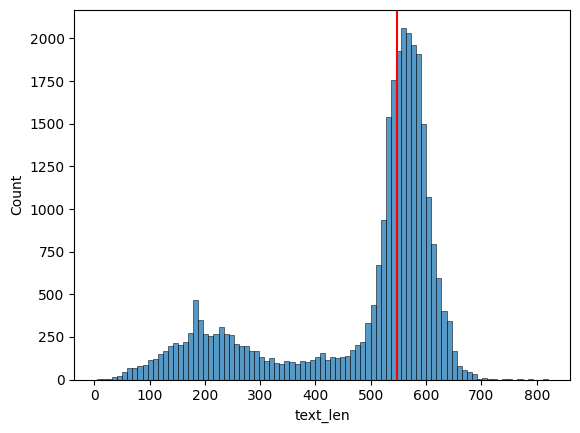

In [ ]:
sns.histplot(data = full_df, x = "text_len")
plt.axvline(x = np.median(full_df["text_len"].dropna()), color = "red")
plt.show()

In [ ]:
print("Median:", np.median(full_df["text_len"].dropna()))



Median: 548.0


In [ ]:
full_df[full_df["text_len"] <= 200]

,Topics,Date,bias_label,text,url,bias_prefix,url_prefix,text_len
3,Elections,2012-08-01,left,OPINION\nWarsaw (CNN) -- In the estimation of ...,http://www.cnn.com/2012/07/31/politics/romney-...,left,left,190.0
6,Elections,2012-08-16,left,The most emotionally powerful minute of Joe Bi...,http://www.politico.com/news/stories/0812/7977...,left,left,120.0
27,Elections,2012-08-26,left,Question 1: Is it possible for Mitt Romney to ...,http://www.washingtonpost.com/wp-srv/special/p...,left,left,114.0
42,Elections,2012-08-28,left,Ann Romney will take to the podium here Tuesda...,http://www.nytimes.com/2012/08/29/us/politics/...,left,left,197.0
43,Elections,2012-08-28,left,Ann Romney will take to the podium here Tuesda...,http://www.politico.com/news/stories/0812/8022...,left,left,197.0
...,...,...,...,...,...,...,...,...
88629,Politics,2024-11-13,right,President-elect Donald Trump met his successor...,https://www.washingtontimes.com/news/2024/nov/...,right,right,188.0
88630,Politics,2024-11-13,right,President-elect Donald Trump met his successor...,https://www.foxnews.com/politics/bob-casey-ref...,right,right,188.0
88631,Politics,2024-11-13,right,President-elect Donald Trump met his successor...,https://www.foxnews.com/politics/trump-picks-f...,right,right,188.0
89507,The Americas,2025-01-28,right,The Gulf of America and Mount McKinley will so...,https://nypost.com/2025/01/27/us-news/google-m...,right,right,180.0


Noticed that we hvae duplicate texts.

In [ ]:
full_df.drop_duplicates(subset = "text", inplace = True)
full_df.shape

(24489, 8)

In [ ]:
full_df

,Topics,Date,bias_label,text,url,bias_prefix,url_prefix,text_len
0,Elections,2012-07-26,left,Mitt Romney told British leaders he hopes to t...,http://politicalticker.blogs.cnn.com/2012/07/2...,left,left,410.0
3,Elections,2012-08-01,left,OPINION\nWarsaw (CNN) -- In the estimation of ...,http://www.cnn.com/2012/07/31/politics/romney-...,left,left,190.0
6,Elections,2012-08-16,left,The most emotionally powerful minute of Joe Bi...,http://www.politico.com/news/stories/0812/7977...,left,left,120.0
9,Elections,2012-08-17,left,With the spotlight back on Mitt Romney's tax r...,http://www.huffingtonpost.com/2012/08/17/obama...,left,left,332.0
12,US Congress,2012-08-20,left,The FBI probed a late-night swim in the Sea of...,http://www.politico.com/news/stories/0812/7986...,left,left,238.0
...,...,...,...,...,...,...,...,...
89891,Media Industry,2025-02-24,right,MSNBC anchor Joy Reid confirmed her final Reid...,https://washingtonexaminer.com/news/entertainm...,right,right,501.0
89894,Elections,2025-02-24,right,Germany's hard right AfD has surged to second ...,https://www.dailymail.co.uk/news/article-14427...,right,right,392.0
89897,Russia,2025-02-25,right,Vladimir Putin has signalled he could agree to...,https://www.dailymail.co.uk/news/article-14433...,right,right,516.0
89902,Politics,2025-02-25,right,"On Monday, Republican Florida Gov. Ron DeSanti...",https://townhall.com/tipsheet/madelineleesman/...,right,right,283.0


In [ ]:
full_df1 = full_df[full_df["text_len"] > 25]

In [ ]:
full_df1.to_csv("full_df1.csv")

In [ ]:
import re

In [ ]:
def clean_text(text):
  text = re.sub(r"http\S+", "", text)
  text = re.sub(r"\n", " ", text)
  text = re.sub(r"--+", "", text)
  text = re.sub(r"\s+", " ", text)
  return text

In [ ]:
full_df1.loc[:, "clean_text"] = full_df1["text"].apply(clean_text)

/tmp/ipython-input-1269622278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df1.loc[:, "clean_text"] = full_df1["text"].apply(clean_text)


In [ ]:
full_df1

,Topics,Date,bias_label,text,url,bias_prefix,url_prefix,text_len,clean_text
0,Elections,2012-07-26,left,Mitt Romney told British leaders he hopes to t...,http://politicalticker.blogs.cnn.com/2012/07/2...,left,left,410.0,Mitt Romney told British leaders he hopes to t...
3,Elections,2012-08-01,left,OPINION\nWarsaw (CNN) -- In the estimation of ...,http://www.cnn.com/2012/07/31/politics/romney-...,left,left,190.0,OPINION Warsaw (CNN) In the estimation of Mitt...
6,Elections,2012-08-16,left,The most emotionally powerful minute of Joe Bi...,http://www.politico.com/news/stories/0812/7977...,left,left,120.0,The most emotionally powerful minute of Joe Bi...
9,Elections,2012-08-17,left,With the spotlight back on Mitt Romney's tax r...,http://www.huffingtonpost.com/2012/08/17/obama...,left,left,332.0,With the spotlight back on Mitt Romney's tax r...
12,US Congress,2012-08-20,left,The FBI probed a late-night swim in the Sea of...,http://www.politico.com/news/stories/0812/7986...,left,left,238.0,The FBI probed a late-night swim in the Sea of...
...,...,...,...,...,...,...,...,...,...
89891,Media Industry,2025-02-24,right,MSNBC anchor Joy Reid confirmed her final Reid...,https://washingtonexaminer.com/news/entertainm...,right,right,501.0,MSNBC anchor Joy Reid confirmed her final Reid...
89894,Elections,2025-02-24,right,Germany's hard right AfD has surged to second ...,https://www.dailymail.co.uk/news/article-14427...,right,right,392.0,Germany's hard right AfD has surged to second ...
89897,Russia,2025-02-25,right,Vladimir Putin has signalled he could agree to...,https://www.dailymail.co.uk/news/article-14433...,right,right,516.0,Vladimir Putin has signalled he could agree to...
89902,Politics,2025-02-25,right,"On Monday, Republican Florida Gov. Ron DeSanti...",https://townhall.com/tipsheet/madelineleesman/...,right,right,283.0,"On Monday, Republican Florida Gov. Ron DeSanti..."


In [ ]:
print(full_df1["clean_text"].sample(5).values)
print(full_df1["clean_text"].str.len().describe())


['The personal details of US military commanders and thousands of prominent Americans have been amassed since 2017 by a Chinese technology company with reported ties to the country’s military and intelligence networks, according to a report on leaked data. A database of about 2.4 million people, including at least 50,000 Americans, was compiled by the small Chinese company called Shenzhen Zhenhua Data Technology, the Washington Post reported. The massive trove — called the Overseas Key Information Database, or OKIDB — includes biographies and service records of the US military commanders,...'
 'More than 4.4 million Americans filed for unemployment benefits last week, according to the Labor Department, a signal that the tidal wave of job losses continues to grow during the coronavirus pandemic. It’s the fifth-straight week that job losses were measured in the millions. From March 15 to April 18, 26.5 million have likely been laid off or furloughed. Jobless figures on this scale haven’t

In [ ]:
full_df1.to_csv("full_df1pt2.csv")

In [ ]:
full_df1.head()

,Topics,Date,bias_label,text,url,bias_prefix,url_prefix,text_len,clean_text
0,Elections,2012-07-26,left,Mitt Romney told British leaders he hopes to t...,http://politicalticker.blogs.cnn.com/2012/07/2...,left,left,410.0,Mitt Romney told British leaders he hopes to t...
3,Elections,2012-08-01,left,OPINION\nWarsaw (CNN) -- In the estimation of ...,http://www.cnn.com/2012/07/31/politics/romney-...,left,left,190.0,OPINION Warsaw (CNN) In the estimation of Mitt...
6,Elections,2012-08-16,left,The most emotionally powerful minute of Joe Bi...,http://www.politico.com/news/stories/0812/7977...,left,left,120.0,The most emotionally powerful minute of Joe Bi...
9,Elections,2012-08-17,left,With the spotlight back on Mitt Romney's tax r...,http://www.huffingtonpost.com/2012/08/17/obama...,left,left,332.0,With the spotlight back on Mitt Romney's tax r...
12,US Congress,2012-08-20,left,The FBI probed a late-night swim in the Sea of...,http://www.politico.com/news/stories/0812/7986...,left,left,238.0,The FBI probed a late-night swim in the Sea of...
